# Q-Learning


Table Q-learning: Frozen Lake.

Epsilon-Greedy: Taxi

Approximation, Deep Q-Learning


In [1]:
import numpy as np

import random

import gym

import matplotlib.pyplot as plt
%matplotlib inline

### Create the environment


In [4]:
env = gym.make('FrozenLake-v1', is_slippery=False, new_step_api=True)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


### Parameters

In [11]:
lr = 0.8 # learning rate
gamma = 0.95 # discounting 

NUM_EPISODES = 50 
MAX_STEPS = 100 

### Training the deterministic Q-function



In [12]:
pathLenList = [] # path lengths in episodes
totalRewardList = [] # reward/episode

# tabeled Q-function inicialization 
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    
    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
            
        # choice using current policy
        a = np.argmax(Q[s,:])
        
        s1, r, done, _, _ = env.step(a)
        
        # targeted Q-function
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        # implementing a change of Q-function
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    print('Episode {}: Total reward = {}'.format(i, totalReward))        

Episode 0: Total reward = 0.0
Episode 1: Total reward = 0.0
Episode 2: Total reward = 1.0
Episode 3: Total reward = 1.0
Episode 4: Total reward = 1.0
Episode 5: Total reward = 1.0
Episode 6: Total reward = 1.0
Episode 7: Total reward = 1.0
Episode 8: Total reward = 1.0
Episode 9: Total reward = 1.0
Episode 10: Total reward = 1.0
Episode 11: Total reward = 1.0
Episode 12: Total reward = 1.0
Episode 13: Total reward = 1.0
Episode 14: Total reward = 1.0
Episode 15: Total reward = 1.0
Episode 16: Total reward = 1.0
Episode 17: Total reward = 1.0
Episode 18: Total reward = 1.0
Episode 19: Total reward = 1.0
Episode 20: Total reward = 1.0
Episode 21: Total reward = 1.0
Episode 22: Total reward = 1.0
Episode 23: Total reward = 1.0
Episode 24: Total reward = 1.0
Episode 25: Total reward = 1.0
Episode 26: Total reward = 1.0
Episode 27: Total reward = 1.0
Episode 28: Total reward = 1.0
Episode 29: Total reward = 1.0
Episode 30: Total reward = 1.0
Episode 31: Total reward = 1.0
Episode 32: Total 

Path history

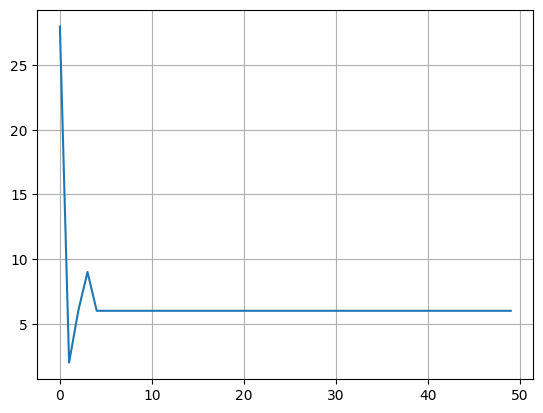

In [14]:
plt.plot(pathLenList)
plt.grid()

Total reward

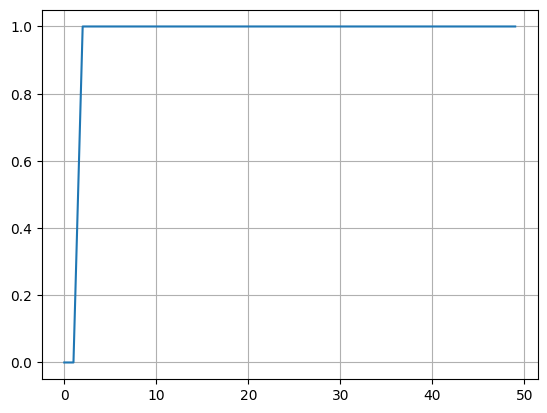

In [15]:
plt.plot(totalRewardList)
plt.grid()

### Taxi

Exploration Q-learning, epsilon-greedy approach

In [46]:
env = gym.make("Taxi-v3", new_step_api=True)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 500
Actions: 6


In [47]:
lr = 0.8 # learning rate
gamma = 0.6 # discounting rate
#epsilon = 0.1 # chance of a random action

NUM_EPISODES = 20000 
MAX_STEPS = 100 

In [48]:
pathLenList = [] # path lengths in episodes
totalRewardList = [] # reward/episode

# tabeled Q-function inicialization 
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

In [52]:
for i in range(NUM_EPISODES):
    
    s = env.reset()
    done = False
    totalReward = 0
    steps = 0
    penalties = 0
    epsilon = 0.5 - float(i)/NUM_EPISODES/2

    while not done:
        steps += 1
        if random.uniform(0, 1) < epsilon:
            a = env.action_space.sample() # Pick a new action for this state.
        else:
            a = np.argmax(Q[s,]) # Pick the action which has previously given the highest reward.
    
        

        
        s1, r, done, tr, info = env.step(a)
        
        # targeted Q-function
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        # implementing a change of Q-function
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target


        totalReward += r
        if r == -10: # Checks if agent attempted to do an illegal action.
            penalties += 1
        s = s1
        
        
        if done:
            break
            
    pathLenList.append(steps)
    totalRewardList.append(totalReward)
    if i % 1000 == 0:
      print('Episode {}: Total reward = {}'.format(i, totalReward))

print("Training finished.\n")


Episode 0: Total reward = -1
Episode 1000: Total reward = -17
Episode 2000: Total reward = -40
Episode 3000: Total reward = -25
Episode 4000: Total reward = -42
Episode 5000: Total reward = -16
Episode 6000: Total reward = -22
Episode 7000: Total reward = -5
Episode 8000: Total reward = 1
Episode 9000: Total reward = -7
Episode 10000: Total reward = 0
Episode 11000: Total reward = -19
Episode 12000: Total reward = 6
Episode 13000: Total reward = -19
Episode 14000: Total reward = 8
Episode 15000: Total reward = 6
Episode 16000: Total reward = -4
Episode 17000: Total reward = 8
Episode 18000: Total reward = -3
Episode 19000: Total reward = 7
Training finished.



In [53]:
total_epochs, total_penalties = 0, 0

for _ in range(10):
    s = env.reset()
    epochs, penalties, r = 0, 0, 0
    
    done = False


    while not done:
        a = np.argmax(Q[s, :])
        s, r, done, tr, info = env.step(a)

        if r == -10:
            penalties += 1

        epochs += 1
        
        #env.render()
        
        # print(f"Timestep: {epochs}")
        # print(f"State: {s}")
        # print(f"Action: {a}")
        # print(f"Reward: {r}")
         

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after 10 episodes:")
print(f"Average timesteps per episode: {total_epochs / 10}")
print(f"Average penalties per episode: {total_penalties / 10}")

Results after 10 episodes:
Average timesteps per episode: 14.4
Average penalties per episode: 0.0


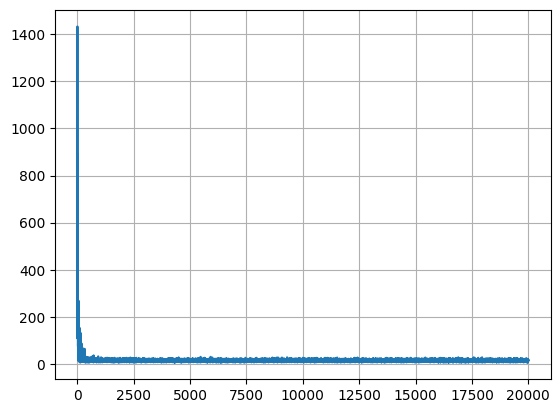

In [43]:
plt.plot(pathLenList)
plt.grid()

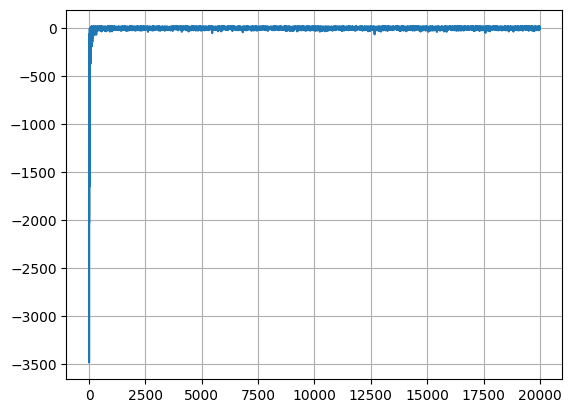

In [45]:
plt.plot(totalRewardList)
plt.grid()




###Deep Q-Learning: Frozen Lake



In [2]:
import tensorflow as tf

### Create the environment


In [3]:
env = gym.make('FrozenLake-v1', is_slippery=False, new_step_api=True)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Parameters

In [4]:
lr = 0.1 # learning rate
gamma = 0.95 # discounting rate

NUM_EPISODES = 1000 
MAX_STEPS = 100 

REWARD_AVERAGE_WINDOW = 20 # moving average

### Create the model, analog of Q-function

In [22]:
# same size as the Q-function previously
# helps to transform state s into vector
model = tf.keras.Sequential([
    
    
    tf.keras.layers.Embedding(NUM_STATES, NUM_ACTIONS, tf.initializers.RandomUniform(0, 1)),
    

])

#function to calculate the vector
def evalQ(s):
    inp = np.array([[s]], dtype=np.int32)
    return model(inp).numpy()[0][0]

In [23]:
#loss function similar to regression tasks

def loss(q1, q2):
    return tf.reduce_sum(tf.square(q1 - q2))

optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(loss=loss, optimizer=optimizer)

In [24]:
pathLenList = [] 
totalRewardList = [] 
totalRewardAverageList = [] # moving average on episode

for i in range(NUM_EPISODES):

    eps = 1.0 - i / NUM_EPISODES

    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1

        Q_s = evalQ(s)
        
        if np.random.rand() < eps:
            # random action
            a = env.action_space.sample()
        else:
            # action based on current policy
            a = np.argmax(Q_s)
        
        # next step
        s1, r, done, tr, info = env.step(a)

        Q_s1 = evalQ(s1)
        
        # new Q-function value
        Q_target = Q_s
        if done:
            Q_target[a] = r
        else:
            Q_target[a] = r + gamma * np.max(Q_s1)
              
        # Q-function update
        inp = np.array([[s]], dtype=np.int32)
        model.train_on_batch(inp, Q_target[None, None, ...]) # one step of gradient descent/training of the model, additional dimensions for tf model, using one batch
        
        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

Episode 100: average total reward = 0.0
Episode 200: average total reward = 0.0
Episode 300: average total reward = 0.1
Episode 400: average total reward = 0.25
Episode 500: average total reward = 0.45
Episode 600: average total reward = 0.45
Episode 700: average total reward = 0.65
Episode 800: average total reward = 0.85
Episode 900: average total reward = 0.85


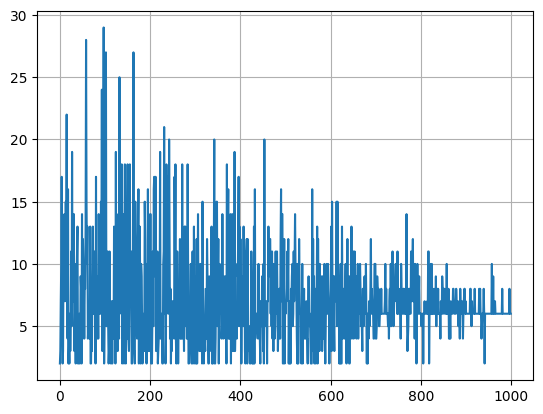

In [25]:
plt.plot(pathLenList)
plt.grid()

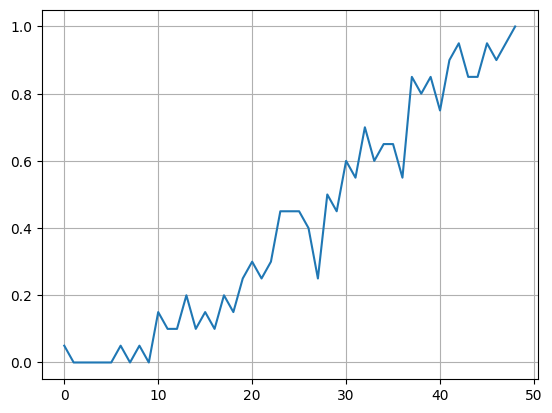

In [26]:
plt.plot(totalRewardAverageList)
plt.grid()

In [27]:
totalReward = 0
s = env.reset()

for _ in range(100):
    
    a = np.argmax(evalQ(s)) 
    s, r, done, tr, info = env.step(a)
    totalReward += r
    if done:
        break

env.close()
print('Total reward = {}'.format(totalReward))

Total reward = 1.0
